# chapter1：Basic konwledge
第一章主要学习统计学的基本知识和基本概念。

【统计学】：“收集、分析、展示、解释数据的科学”
    研究的基本流程：采用直接或者间接的方式收集数据-利用一些方法来整理和分析数据-分析数据得到结论；统计学应该是数据科学！
【概率】：概率描述了某件事情的发生的机会(描述性定义)；事件A发生的次数k和总的实验次数n的比值(统计性定义)；
【随机试验】：1.试验可以在相同的条件下重复进行 2.试验的所有可能结果是明确可知道的，并且不止一个 3.每一次试验会出现哪一个结果事先是不确定的。
【样本空间】：样本点的全体组成集合称为样本空间，随机试验的每一个可能的结果都会是一个样本点

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 变量和数据
变量分为：定性变量和定量变量
当变量所取得值是数量时，该变量称为定量变量（数量变量）；当变量代表性别或者观点的取非数量值的变量就称为定性变量（分类变量、属性变量）。
>现实世界中，变量之间是相互联系的，不讨论变量之间的联系，就无法谈起任何有深度的应用，而没有应用，统计学就只是一个摆设。

d:\anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


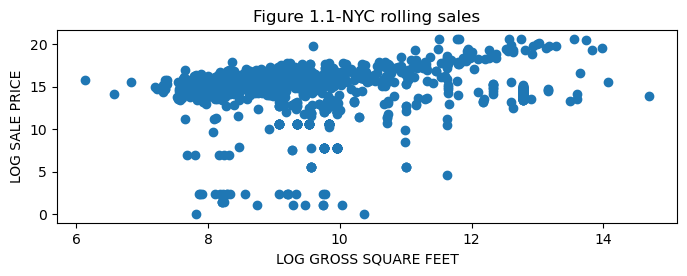

In [23]:
df = pd.read_excel("/Statistics/Statistics-from-data-to-conclusion-5e/data/rollingsales_manhattan.xlsx",index_col=False)
plt.figure(figsize=(8,2.5))
plt.scatter(np.log(df['GROSS SQUARE FEET']), np.log(df['SALE PRICE']))
#sns.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE',data=df,palette='coolwarm')
plt.title('Figure 1.1-NYC rolling sales')
plt.xlabel('LOG GROSS SQUARE FEET')
plt.ylabel('LOG SALE PRICE')
plt.show()

上图中，横轴代表地产面积，纵轴代表价格。从该图中可以看出，总体来说，房屋的面积越大，售价越高，他们之间有很强的相关，并不是严格按照这一规律，在每一个面积范围，售价差别很大。

d:\anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


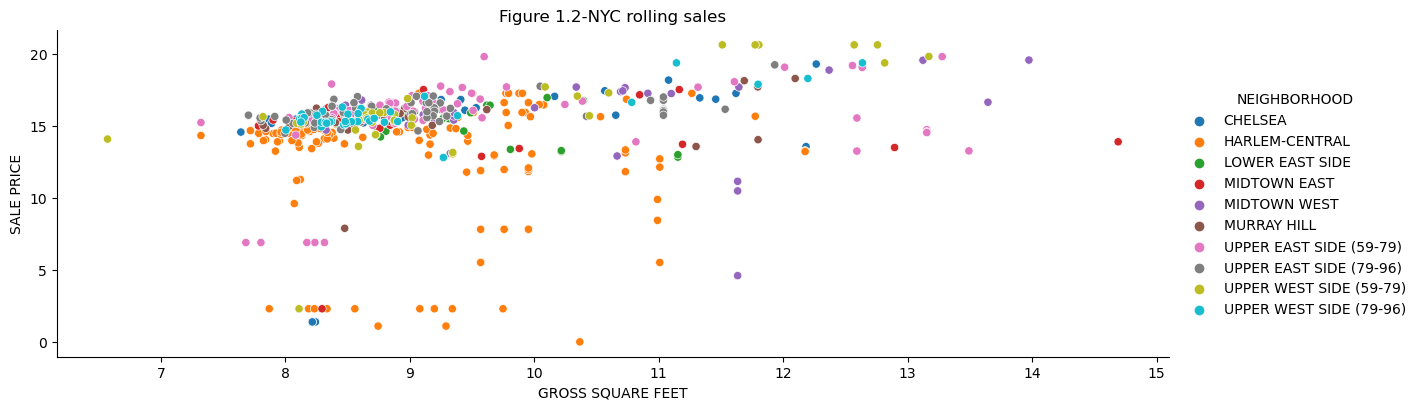

In [22]:
from collections import Counter
d = Counter(df['NEIGHBORHOOD'])
top = []
for k,w in enumerate(sorted(d,key=d.get,reverse=True)):
    if k < 10:
        top.append(w)
v1 = df[df['NEIGHBORHOOD'].isin(top)]
sns.relplot(x=np.log(v1['GROSS SQUARE FEET']), y=np.log(
    v1['SALE PRICE']), hue=v1['NEIGHBORHOOD'],height=4,aspect=3)
plt.title('Figure 1.2-NYC rolling sales')
plt.show()

将售房数前十名的街区信息加入到上图中，形成的只有这些街区的售价和地产面积的散点图，包含的信息比Figure 1.1情况更为复杂。

研究过程中，我们希望数据可以回答我们如下问题：
1.两个变量之间是否有关系？
2.如果有关系，是否具有普遍性？
3.这些关系是什么关系？
4.这些关系是否还受到其他关系的影响？
5.这个关系是不是因果关系？

### 定性变量之间的关系

In [26]:
w = pd.read_csv('/Statistics/Statistics-from-data-to-conclusion-5e/data/change.txt',sep=" ")
pd.pivot_table(w, index=['Age'], values=['Freq'], columns=['Change', 'Edu'],aggfunc=[np.sum])


sum                                 
       Freq                                 
Change    1            2           3        
Edu       1    2   3   1   2   3   1   2   3
Age                                         
1        28  110  70   4  12  19  10  59  64
2        31  138  67  11  27  18  20  99  89
3         2   14  23   1   4  11   5  18  36

列联表展示了年龄与受教育程度对跳槽意愿的人数占比。

In [27]:
pd.pivot_table(w, index=['Edu'], values=['Freq'], columns=['Change'],aggfunc=[np.sum])

sum         
       Freq         
Change    1   2    3
Edu                 
1        61  16   35
2       262  43  176
3       160  48  189

### 定量与定性变量之间的混合关系

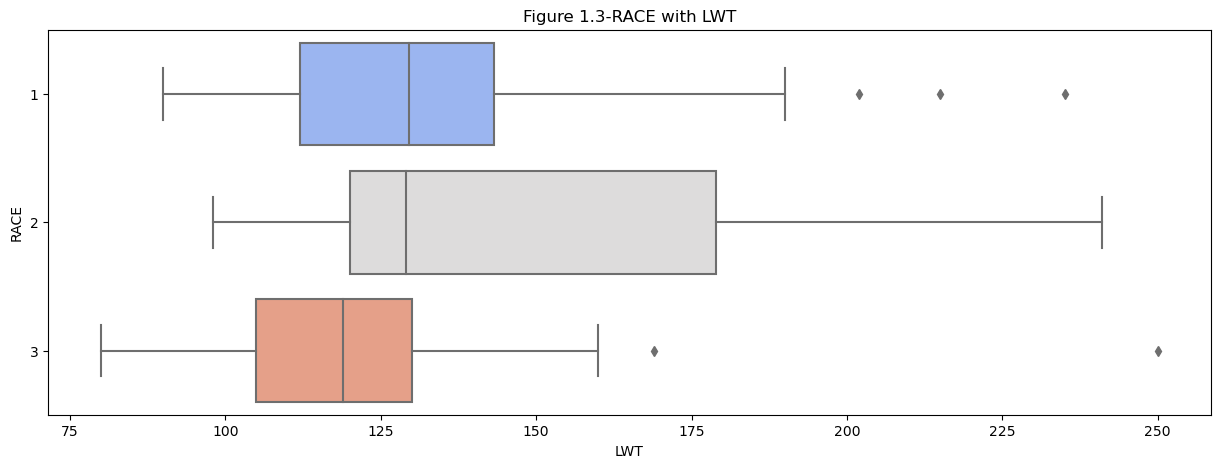

In [30]:
u = pd.read_csv('/Statistics/Statistics-from-data-to-conclusion-5e/data/lowbwt.txt',sep="\s+")
plt.figure(figsize=(15,5))
sns.boxplot(y='RACE',x='LWT',data=u,orient='h',palette='coolwarm')
plt.title('Figure 1.3-RACE with LWT')
plt.show()

上图显示了不同种族(定性)与怀孕母亲体重(定量)之间的关系，不同盒装图对应相应的种族。

# chapter2：Selecting data

自然状态下，未被控制二而得到的数据为观测数据；在人工干预之下收集到的数据称为试验数据。

每一个调查对象作为一个个体，包含与被调查的总体之中；而部分个体是该总体的一个样本。
抽样可分为：概率抽样和非概率抽样两种方式。
概率抽样：系统抽样、分成抽样、整群抽样、多级抽样
非概率抽样：目的抽样、方便抽样、判断抽样、定顺抽样、雪球抽样、自我选择

抽样误差分为：相应误差和非相应误差。

chapter1-2做一个简单的入门，让我们开启有趣的统计分析学习之路吧！！！